# 回归分析

## 利用$\beta_0$和$\beta_1$的估计,画出线性回归$f(x)$的95%置信区间


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
x=[9.86 ,7.29 ,3.87 ,9.99 ,3.06 ,7.82 ,5.98 ,4.47 ,7.38 ,1.14 ,3.92 ,3.41 ,5.86 ,3.52 ,6.00 ,2.06 ,6.29 ,2.06 ,7.40 ,2.54]
y=[42.40 ,25.32 ,16.10 ,37.22 ,13.06 ,35.36 ,29.34 ,18.79 ,25.98 ,7.59 ,13.89 ,13.67 ,26.13 ,20.87 ,27.76 ,3.66 ,19.01 ,4.00 ,22.22 ,17.93]

21.015 3.714831890803279 0.9882690075427537 0.39345317447405465
5.196000000000001


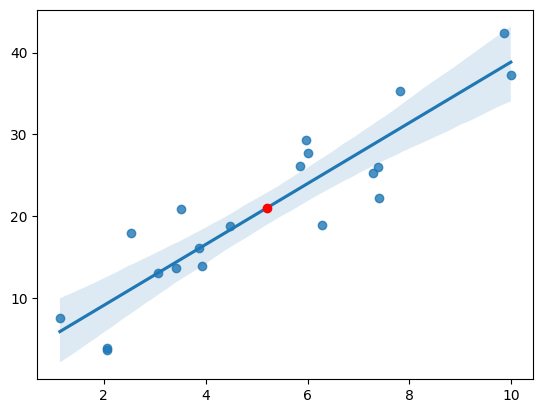

In [3]:
import numpy as np
sx=np.var(x)*len(x)
sy=np.var(y)*len(y)
meanx=np.mean(x)
meany=np.mean(y)
n=len(x)

beta0=meany
beta1= sum((x-meanx)*y)/sx
residual=sum((y-beta0-beta1*(x-meanx))**2)
sigma=np.sqrt(residual/(n-2))

std_beta0=sigma/np.sqrt(n)
std_beta1=sigma/np.sqrt(sx)
print(beta0,beta1,std_beta0,std_beta1)
print(meanx)
sns.regplot(x=x, y=y, ci=95)
plt.plot(meanx,beta0,'ro')
plt.show()


In [4]:
import scipy.stats as st
fa=n/2/(n-1)
a=st.f(2,n-2).ppf(0.95)/fa
achi=st.chi2(2).ppf(0.95)
nsigma=st.t(n-2).ppf(0.975)

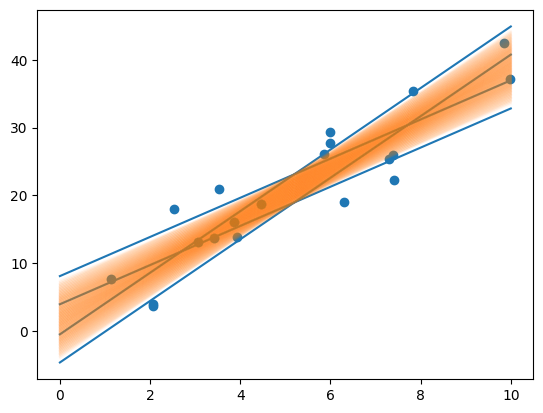

In [8]:
fig = plt.figure()

plt.plot(x,y,"o")
# 分别计算出 beta_0 和 beta_1 的置信区间，在这个矩形区域中进行遍历
# 通过f检验的区域才是f(x)的置信区间

# 单个边界
for j in (beta0-nsigma*std_beta0, beta0+nsigma*std_beta0):
    for i in (beta1-nsigma*std_beta1,beta1+nsigma*std_beta1):
        plt.plot([0,10],[i*0+j-meanx*i,i*10+j-meanx*i],color='C0')
        
# 联合边界，且满足置信区间条件
for j in np.linspace(beta0-nsigma*std_beta0, beta0+nsigma*std_beta0,20):
    for i in np.linspace(beta1-nsigma*std_beta1,beta1+nsigma*std_beta1,20):
        if ((j-beta0)/std_beta0)**2+((i-beta1)/std_beta1)**2<a:
            b0j=j-i*meanx
            plt.plot([0,10],[i*0+b0j,i*10+b0j],color='C1',alpha=0.05)

## 利用$b_0$和$b_1$的协方差矩阵，画出线性回归$f(x)$的95%置信区间

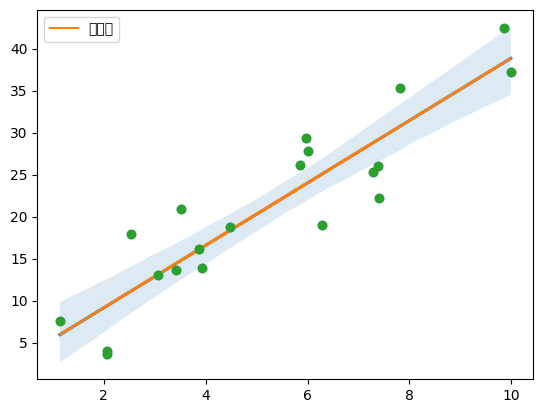

In [19]:
b1 = beta1
b0 = beta0 - meanx * beta1
x = np.array(x)
sns.regplot(x=x, y=y, ci=95)
plt.plot(x, b0 + b1 * x, label='拟合线')
plt.plot(x,y,"o")
plt.legend()
plt.show()
# 这里可以发现，b0 b1几乎和sns的库重合

[[ 1.02388139  5.32008769]
 [ 5.32008769 34.10289858]]


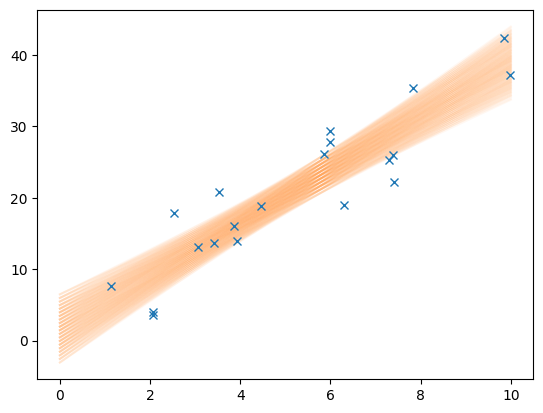

In [40]:
import statsmodels.api as sm

X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
b0, b1 = results.params
cov_matrix = results.cov_params()
print(np.linalg.inv(cov_matrix))


std_b0 = np.sqrt(cov_matrix[0, 0])
std_b1 = np.sqrt(cov_matrix[1, 1])


# 遍历b0 b1的置信区间，通过计算找到可行区域
for j in np.linspace(b0-nsigma*std_b0, b0+nsigma*std_b0,20):
    for i in np.linspace(b1-nsigma*std_b1,b1+nsigma*std_b1,20):
        M = np.array([[j-b0],[i-b1]])
        if M.T @ np.linalg.inv(cov_matrix) @ M < a:
            plt.plot([0,10],[j,10*i+j],color='C1',alpha=0.05)

plt.plot(x,y,"x")
plt.show()